In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  
%matplotlib inline 

In [2]:
dataset = pd.read_excel('ESK5039.xlsx')

In [3]:
dataset.columns

Index(['Date Time Hour Beginning', 'Original Res Forecast before Lockdown',
       'Residual Forecast', 'RSA Contracted Forecast',
       'Dispatchable Generation', 'Residual Demand', 'RSA Contracted Demand',
       'International Exports', 'International Imports', 'Thermal Generation',
       'Nuclear Generation', 'Eskom Gas Generation', 'Eskom OCGT Generation',
       'Hydro Water Generation', 'Pumped Water Generation', 'ILS Usage',
       'Manual Load_Reduction(MLR)', 'IOS Excl ILS and MLR',
       'Dispatchable IPP OCGT', 'Eskom Gas SCO', 'Eskom OCGT SCO',
       'Hydro Water SCO', 'Pumped Water SCO Pumping', 'Wind', 'PV', 'CSP',
       'Other RE', 'Total RE', 'Wind Installed Capacity',
       'PV Installed Capacity', 'CSP Installed Capacity',
       'Other RE Installed Capacity', 'Total RE Installed Capacity',
       'Installed Eskom Capacity', 'Total PCLF', 'Total UCLF', 'Total OCLF',
       'Total UCLF+OCLF', 'Non Comm Sentout', 'Drakensberg Gen Unit Hours',
       'Palmiet Gen 

In [4]:
Dataset = dataset.drop([ 'Original Res Forecast before Lockdown',
       'Residual Forecast', 'RSA Contracted Forecast',
       'Dispatchable Generation', 'Residual Demand', 'Thermal Generation',
       'Nuclear Generation', 'Eskom Gas Generation', 'Eskom OCGT Generation',
       'Hydro Water Generation', 'Pumped Water Generation', 'ILS Usage',
       'Manual Load_Reduction(MLR)', 'IOS Excl ILS and MLR',
       'Dispatchable IPP OCGT', 'Eskom Gas SCO', 'Eskom OCGT SCO',
       'Hydro Water SCO', 'Pumped Water SCO Pumping', 'Wind', 'PV', 'CSP',
       'Other RE',
       'Other RE Installed Capacity' ,'Non Comm Sentout', 'Drakensberg Gen Unit Hours',
       'Palmiet Gen Unit Hours', 'Ingula Gen Unit Hours', 'Unnamed: 42'], axis=1)

In [5]:
dataset

,Date Time Hour Beginning,Original Res Forecast before Lockdown,Residual Forecast,RSA Contracted Forecast,Dispatchable Generation,Residual Demand,RSA Contracted Demand,International Exports,International Imports,Thermal Generation,...,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Non Comm Sentout,Drakensberg Gen Unit Hours,Palmiet Gen Unit Hours,Ingula Gen Unit Hours,Unnamed: 42
0,2019-04-01 00:00:00,NaN,20126.707,21100.944,21035.27,21035.27,21795.048,1220.728,919.0,19988.0,...,44104.0,5246.00,10828.725,766.4,11595.125,125.0,1632.0,91.5,48.0,49.77
1,2019-04-01 01:00:00,NaN,19822.447,20826.932,20548.27,20548.27,21498.383,1195.998,834.0,19670.0,...,44104.0,5246.00,10663.279,765.0,11428.000,279.0,1517.0,92.7,49.6,51.27
2,2019-04-01 02:00:00,NaN,19726.316,20765.577,20413.27,20413.27,21409.036,1183.745,765.0,19597.0,...,44104.0,5199.95,10504.001,765.0,11269.000,1.0,1496.0,94.3,51.2,52.83
3,2019-04-01 03:00:00,NaN,19938.506,21027.756,20476.40,20476.40,21469.758,1156.881,739.0,19675.0,...,44104.0,4939.00,10434.095,765.0,11199.000,95.0,1494.0,96.0,53.2,54.39
4,2019-04-01 04:00:00,NaN,20794.305,21928.437,21156.27,21156.27,22204.397,1212.353,926.0,19871.0,...,44104.0,4939.00,10433.393,765.0,11198.000,393.0,1501.0,97.8,55.2,56.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,2024-03-24 19:00:00,NaN,25882.171,27841.855,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43676,2024-03-24 20:00:00,NaN,24204.095,26052.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43677,2024-03-24 21:00:00,NaN,22752.711,24492.911,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43678,2024-03-24 22:00:00,NaN,21549.451,23019.994,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
Dataset.dropna(inplace = True)

In [7]:
mask = (Dataset['Date Time Hour Beginning'] > '2022-12-31')

In [8]:
Dataset = Dataset.loc[mask]

In [9]:
Dataset.set_index('Date Time Hour Beginning', inplace = True)

In [10]:
#Dataset = Dataset[(Dataset['Date Time Hour Beginning'] > '2021-01-01') & (Dataset['Date Time Hour Beginning'] < '2024-01-01')]

# EAF Calculation

Energy Availability Factor of Eskom plant. It is the difference between the maximum availability and all unavailabilities (PCLF, UCLF & OCLF) expressed as a percentage. This excludes renewables, IPPs and international imports.
 
<b>PCLF</b> – Planned Capability Loss Factor of Eskom plant. It is the ratio between the unavailable energy of the units that are out on planned maintenance over a period compared to the total net installed capacity of all units over the same period.

<b>UCLF</b> – Unplanned Capability Loss Factor of Eskom plant. It is the ratio between the unavailable energy of the units that are out on unplanned outages over a period compared to the total net installed capacity of all units over the same period

<b>OCLF</b> – Other Capability Loss Factor of Eskom plant. It is the ratio between the unavailable energy of the units that cannot be dispatched, due to constraints out of the power station management control, over a period compared to the total net installed capacity of all units over the same period.

In [11]:
Dataset['Total_unavail']  =  Dataset['Total PCLF'] + Dataset['Total UCLF'] + Dataset['Total OCLF']


Dataset['EAF'] = (Dataset['Installed Eskom Capacity'] - Dataset['Total_unavail'])/Dataset['Installed Eskom Capacity']

<Axes: xlabel='Date Time Hour Beginning'>

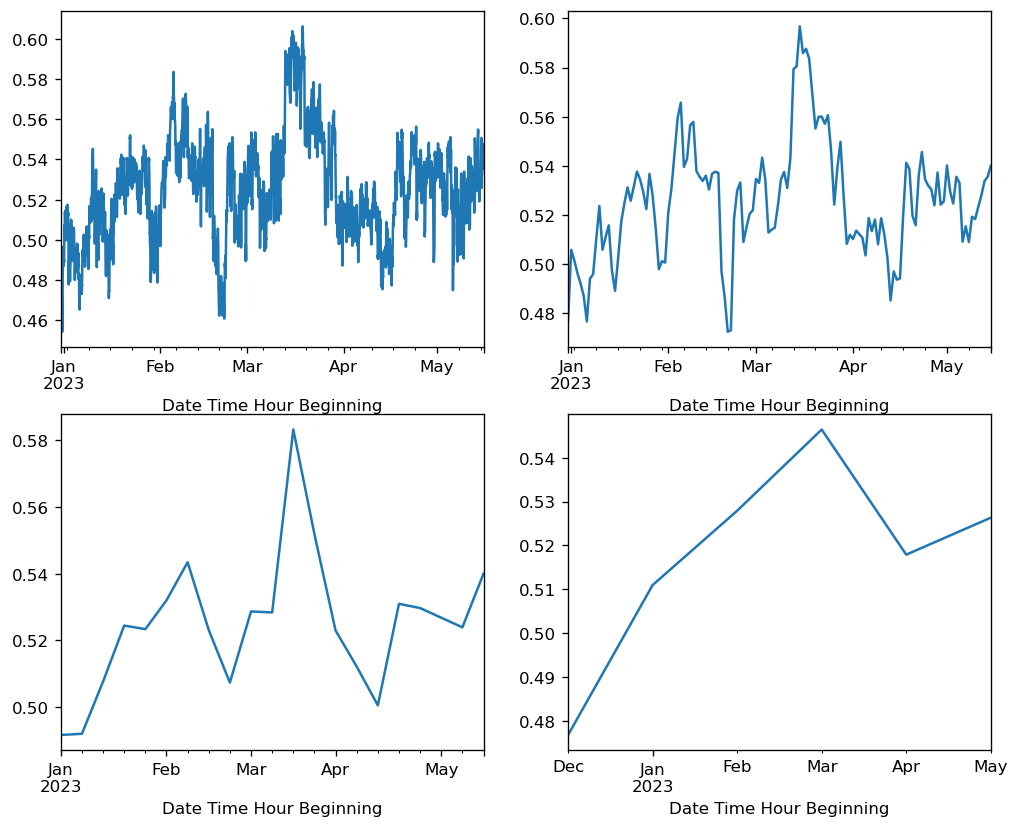

In [12]:
fig, ax = plt.subplots(2,2, figsize=(10,8))

Dataset['EAF'].plot(ax=ax[0,0])
Dataset['EAF'].resample('D').mean().plot(ax=ax[0,1])
Dataset['EAF'].resample('W').mean().plot(ax=ax[1,0])
Dataset['EAF'].resample('M').mean().plot(ax=ax[1,1])

Not quiet done yet. Let us now look at a variable called operating reserves.

In [13]:
Operating_Reserve = 3800 #MW

Now we can calculate the available energy that is available to meet deemand. 

<b>Available_generation</b> = EskomCapacity*EAF + TotalRenewableEnergy + Imports -Exports + Operating reserve.

We can rewrite the TotalRenewableEnergy as the total Renewable Energy installed Capacity multiplied by the Renewable enrgy EAF (<b>EAF_R</b>). This will come in handy when forecasting.

In [14]:
Dataset['EAF_R'] = Dataset['Total RE']/Dataset['Total RE Installed Capacity']

<Axes: xlabel='Date Time Hour Beginning'>

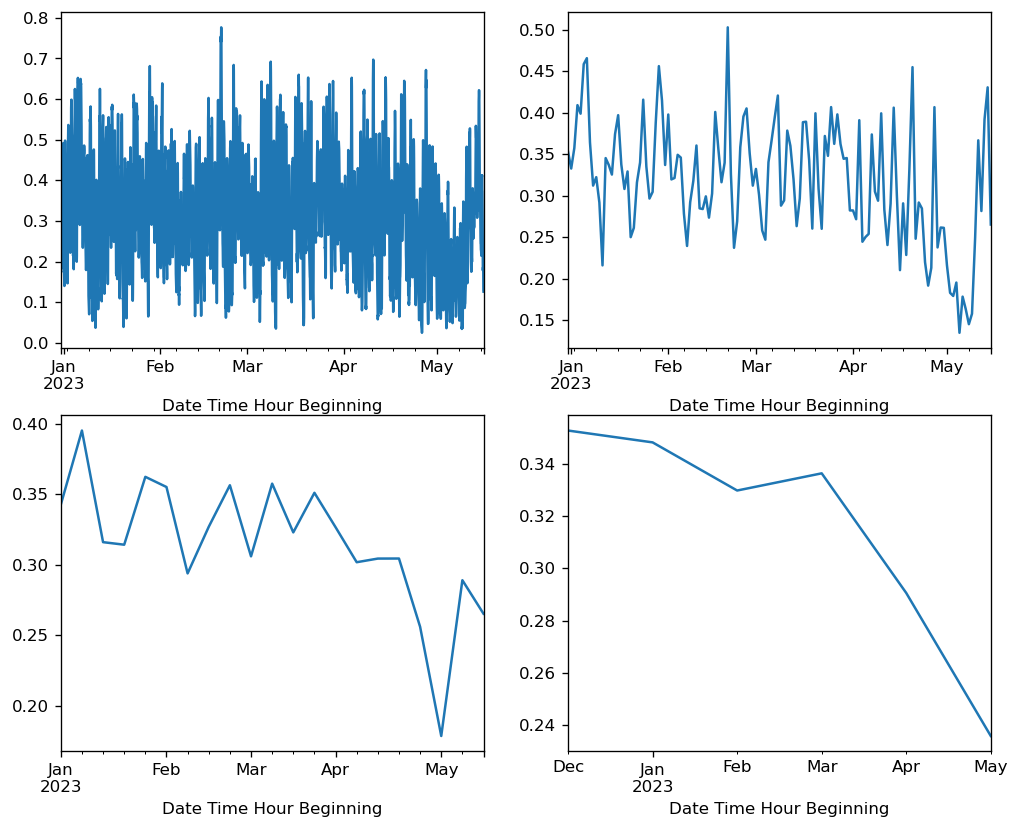

In [15]:
fig, ax = plt.subplots(2,2, figsize=(10,8))

Dataset['EAF_R'].plot(ax=ax[0,0])
Dataset['EAF_R'].resample('D').mean().plot(ax=ax[0,1])
Dataset['EAF_R'].resample('W').mean().plot(ax=ax[1,0])
Dataset['EAF_R'].resample('M').mean().plot(ax=ax[1,1])

In [16]:
Dataset['Available_generation'] = ( Dataset['Installed Eskom Capacity']*Dataset['EAF'] + 
    Dataset['Total RE']*Dataset['EAF_R'] - Dataset['International Exports'] + Dataset['International Imports']
                                 )


In [17]:
# Calculating the surplus/shortfall energy

Dataset['Surplus'] = Dataset['Available_generation'] - Dataset['RSA Contracted Demand'] 

<Axes: xlabel='Date Time Hour Beginning'>

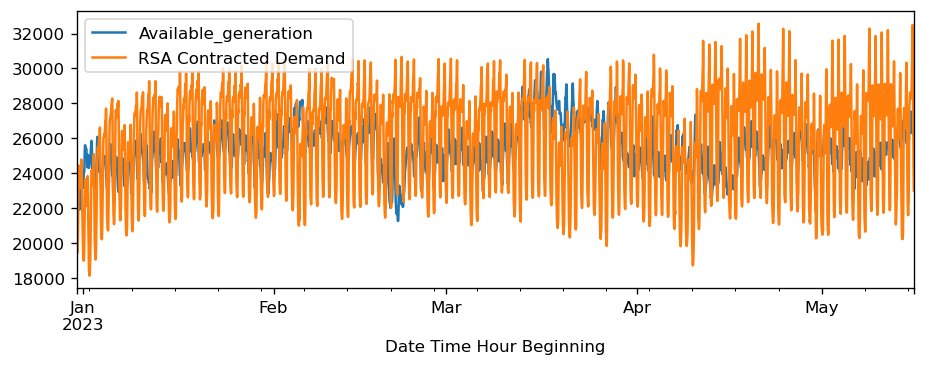

In [18]:
 Dataset[['Available_generation','RSA Contracted Demand']].plot()

In [19]:
##(( Dataset['Installed Eskom Capacity'])*Dataset['EAF'] - Dataset['International Exports'] - 3000 
##+ Dataset['International Imports'])##

In [20]:
Dataset['Surplus']

Date Time Hour Beginning
2022-12-31 01:00:00    2879.978074
2022-12-31 02:00:00    3110.408479
2022-12-31 03:00:00    3126.040737
2022-12-31 04:00:00    2900.546233
2022-12-31 05:00:00    2523.868674
                          ...     
2023-05-15 19:00:00   -4290.387851
2023-05-15 20:00:00   -2423.764914
2023-05-15 21:00:00    -155.840245
2023-05-15 22:00:00    1989.207442
2023-05-15 23:00:00    3187.605539
Name: Surplus, Length: 3263, dtype: float64

In [21]:
Dataset

,RSA Contracted Demand,International Exports,International Imports,Total RE,Wind Installed Capacity,PV Installed Capacity,CSP Installed Capacity,Total RE Installed Capacity,Installed Eskom Capacity,Total PCLF,Total UCLF,Total OCLF,Total UCLF+OCLF,Total_unavail,EAF,EAF_R,Available_generation,Surplus
Date Time Hour Beginning,,,,,,,,,,,,,,,,,,
2022-12-31 01:00:00,19726.198,1245.299,1299.0,1700.400,3442.57,2287.09,500.0,6280.24,46686.0,7204.133,16730.227,659.555,17389.0,24593.915,0.473206,0.270754,22606.176074,2879.978074
2022-12-31 02:00:00,19598.441,1210.729,1308.0,1495.026,3442.57,2287.09,500.0,6280.24,46686.0,7212.000,16602.485,615.831,17218.0,24430.316,0.476710,0.238052,22708.849479,3110.408479
2022-12-31 03:00:00,19424.668,1179.575,1307.0,1303.208,3442.57,2287.09,500.0,6280.24,46686.0,7212.000,16734.609,586.535,17321.0,24533.144,0.474507,0.207509,22550.708737,3126.040737
2022-12-31 04:00:00,19603.095,1234.932,1320.0,1137.779,3442.57,2287.09,500.0,6280.24,46686.0,7212.000,16675.311,586.245,17261.0,24473.556,0.475784,0.181168,22503.641233,2900.546233
2022-12-31 05:00:00,20123.602,1310.511,1358.0,1172.237,3442.57,2287.09,500.0,6280.24,46686.0,7212.000,16506.577,586.245,17092.0,24304.822,0.479398,0.186655,22647.470674,2523.868674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15 19:00:00,30874.972,591.920,1405.0,1144.910,3442.57,2287.09,500.0,6280.24,46686.0,3797.000,16967.437,358.780,17326.0,21123.217,0.547547,0.182304,26584.584149,-4290.387851
2023-05-15 20:00:00,29088.730,495.330,1434.0,1169.038,3442.57,2287.09,500.0,6280.24,46686.0,3797.000,17021.536,358.780,17380.0,21177.316,0.546388,0.186145,26664.965086,-2423.764914
2023-05-15 21:00:00,26688.151,543.114,1408.0,1096.019,3442.57,2287.09,500.0,6280.24,46686.0,3797.000,17054.071,358.780,17412.0,21209.851,0.545691,0.174519,26532.310755,-155.840245


In [22]:
#Dataset = Dataset.resample("W").mean()

# DEMAND

## RSA contracted demand 

Let us look at the plot of elctricity demand. We want to dee the trend. Is there seasonniliy? Is the data stationary?


<Axes: xlabel='Date Time Hour Beginning'>

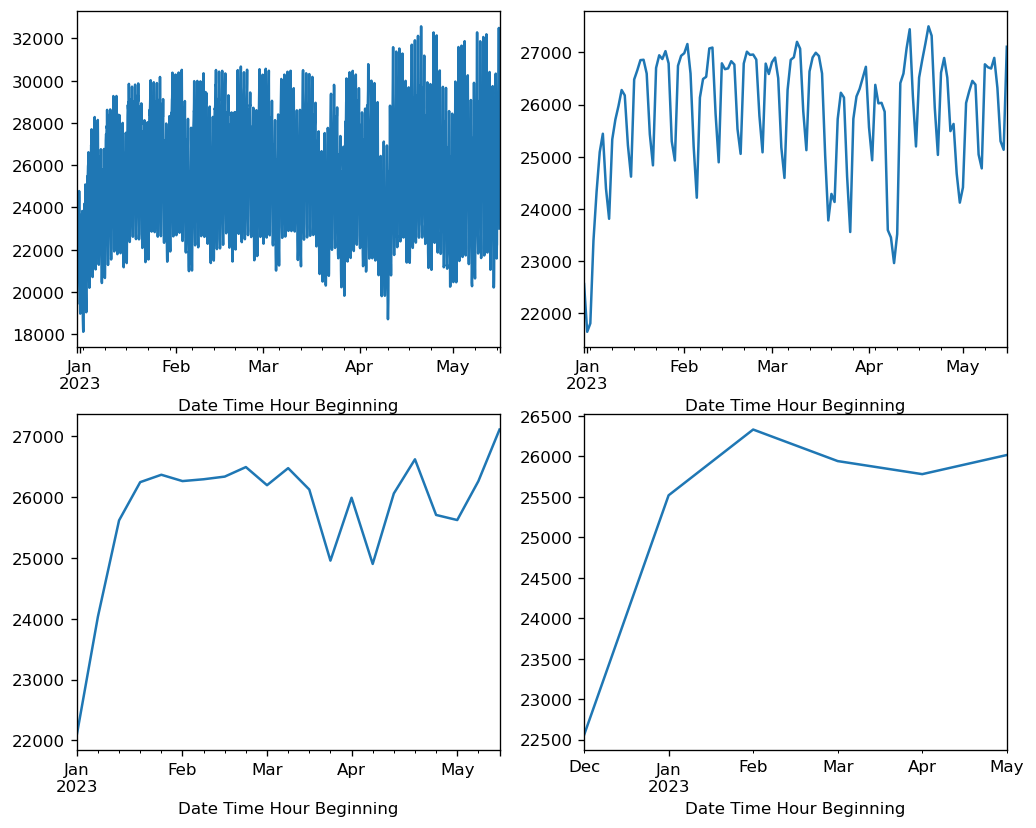

In [23]:


#plot the weekly data

fig, ax = plt.subplots(2,2, figsize=(10,8))

Dataset['RSA Contracted Demand'].plot(ax=ax[0,0])
Dataset['RSA Contracted Demand'].resample('D').mean().plot(ax=ax[0,1])
Dataset['RSA Contracted Demand'].resample('W').mean().plot(ax=ax[1,0])
Dataset['RSA Contracted Demand'].resample('M').mean().plot(ax=ax[1,1])

At first glance, we see there data is stationary and we make use of the seasonal arima model. For surity reasons, we can do the Adfuller test to test for stationarity.

In [24]:
# Adfuller test
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

In [25]:
adfuller_test(Dataset['RSA Contracted Demand'])

ADF Test Statistic : -7.14196611693752
p-value : 3.306317591026556e-10
#Lags Used : 29
Number of Observations Used : 3233
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


P value is wy less thn 0.05. There we can confirm the data is indeed stationsry. We can commernce with the arima mosel

In [26]:
import statsmodels.api as sm

In [28]:
model=sm.tsa.statespace.SARIMAX(Dataset['RSA Contracted Demand'].resample,order=(0, 0, 1),seasonal_order=(1,2,1,12))
results=model.fit()

TypeError: object of type 'method' has no len()

In [ ]:
results.summary()

In [ ]:
model=sm.tsa.statespace.SARIMAX(Dataset['Residual Demand'],order=(0, 0, 0),seasonal_order=(1,1,1,52))
results=model.fit()

Dataset['forecast']=results.predict(start=100,end=125,dynamic=True)
Dataset[['Residual Demand','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[Dataset.index[-1]+ DateOffset(weeks=x)for x in range(0,26)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=Dataset.columns)

In [ ]:
future_datest_df

In [ ]:
#future_datest_df.tail()
future_df=pd.concat([Dataset,future_datest_df])
#future_df

In [ ]:
future_datest_df['RSA Contracted Demand'] = results.predict(start = 104, end = 186, dynamic= False)  
future_datest_df['RSA Contracted Demand'].plot(figsize=(12, 8))
Dataset['Residual Demand'].plot(figsize=(12, 8))

In [ ]:
future_df=pd.concat([Dataset,future_datest_df])

# Unavailabiliies

After Forecasting what the demand would be in 6 months, we can do the same for the EAF

In [ ]:
Daily_PCLF = Dataset['Total PCLF'].resample('W').mean()
Daily_UCLF = Dataset['Total UCLF+OCLF'].resample('W').mean()


Daily_PCLF.plot()
Daily_UCLF.plot()

In [ ]:
from numpy import log
result = adfuller(Daily_PCLF.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

In [ ]:
Daily_EAF = Dataset['EAF']
Daily_EAF.plot()

In [ ]:
result = adfuller(Daily_EAF.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for x, y in result[4].items():
    print('\t%s: %.3f' % (x, y))
if result[0] > result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Stationary")

In [ ]:
model=sm.tsa.statespace.SARIMAX(Daily_EAF,order=(1, 0, 4),seasonal_order=(1,2,1,12))
results=model.fit()

In [ ]:
results.summary()

In [ ]:
future_datest_df['EAF'] = results.predict(start = 104, end = 186, dynamic= False)  
future_datest_df['EAF'].plot(figsize=(12, 8))
Dataset['EAF'].plot(figsize=(12, 8))

In [ ]:
future_datest_df['EAF']

In [ ]:
residuals = pd.DataFrame(modelfit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

# Forecasting
## Assumptions
Before we can calculate the availabe generation, we first state a view assumptions. 
1. Installed eskom capacity wll remain the same till the year end
